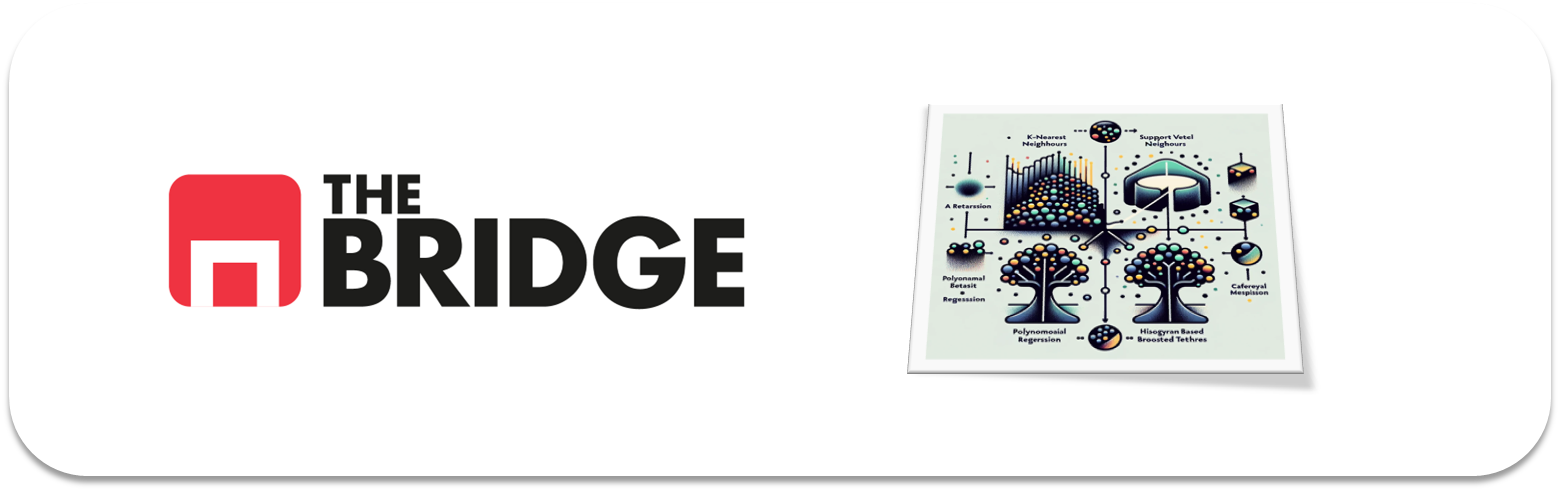

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [66]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [9]:
#Veo que hay nulos en 'NumberOfDependents' y en 'MonthlyIncome'

SeriousDlqin2yrs: Indicador binario de si la persona tuvo problemas financieros graves (como caer en mora 90 días o más) en los próximos 2 años.

RevolvingUtilizationOfUnsecuredLines: Proporción del crédito no asegurado usado (ej. tarjetas de crédito) respecto al crédito total disponible.

age: Edad del solicitante en años.

NumberOfTime30-59DaysPastDueNotWorse: Número de veces que el solicitante estuvo entre 30 y 59 días en mora, pero no peor.

DebtRatio: Relación entre deuda total mensual (incluyendo gastos) y el ingreso bruto mensual.

MonthlyIncome: Ingreso mensual declarado.

NumberOfOpenCreditLinesAndLoans: Número de líneas de crédito y préstamos abiertos (por ejemplo, tarjetas de crédito activas).

NumberOfTimes90DaysLate: Número de veces que el solicitante estuvo en mora 90 días o más.

NumberRealEstateLoansOrLines: Número de préstamos o líneas de crédito relacionados con bienes raíces (hipotecas, etc.).

NumberOfTime60-89DaysPastDueNotWorse: Número de veces que el solicitante estuvo entre 60 y 89 días en mora, pero no peor.

NumberOfDependents: Número de personas dependientes del solicitante (por ejemplo, hijos).

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [11]:
#Considero todas como variables numericas, veo que va a haber que tratarlas

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Un problema de clasificacion binaria, si la persona va a encontrarse o no en problemas financieros en los proximos dos años. Mi variable target es 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [6]:
target = 'SeriousDlqin2yrs'

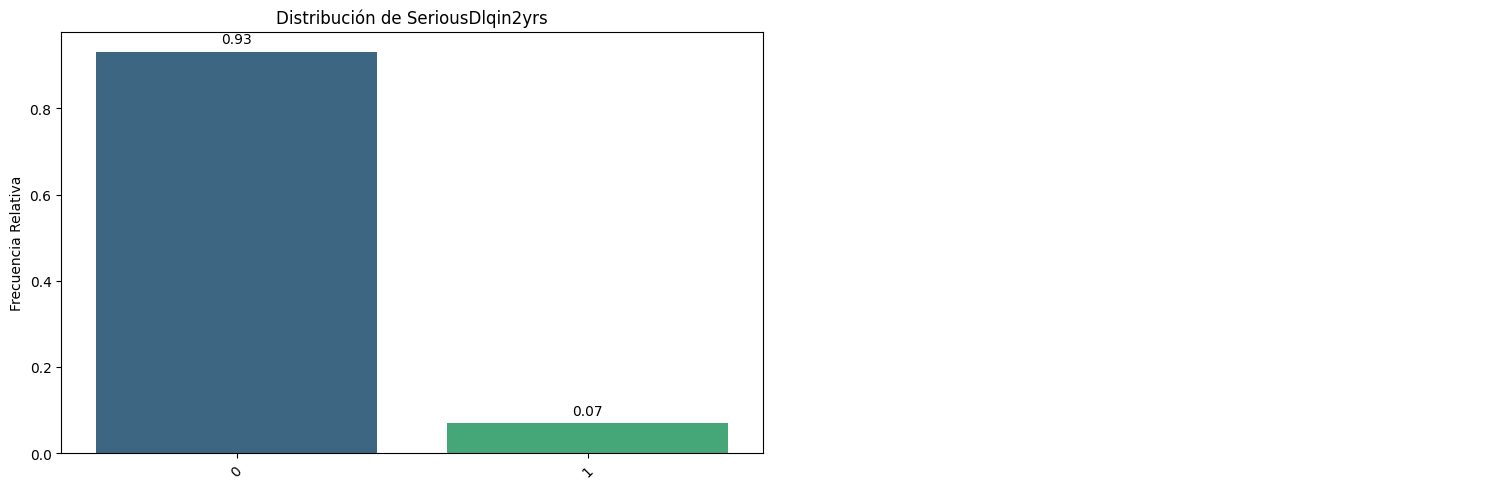

In [7]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores=True, relativa=True )

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
dep = 'NumberOfDependents'
inc = 'MonthlyIncome'

In [13]:
# Reemplazo nulos con la Mediana para MonthlyIncome
inc_median = train_set['MonthlyIncome'].median()

# Reemplazo nulos con la Moda para NumberOfDependents
dep_mode = train_set['NumberOfDependents'].mode()[0]

In [14]:
# Imputo en train_set
train_set['MonthlyIncome'].fillna(inc_median, inplace=True)
train_set['NumberOfDependents'].fillna(dep_mode, inplace=True)

# Imputo en test_set
test_set['MonthlyIncome'].fillna(inc_median, inplace=True)
test_set['NumberOfDependents'].fillna(dep_mode, inplace=True)

/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_78140/3391149066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['MonthlyIncome'].fillna(inc_median, inplace=True)
/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_78140/3391149066.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

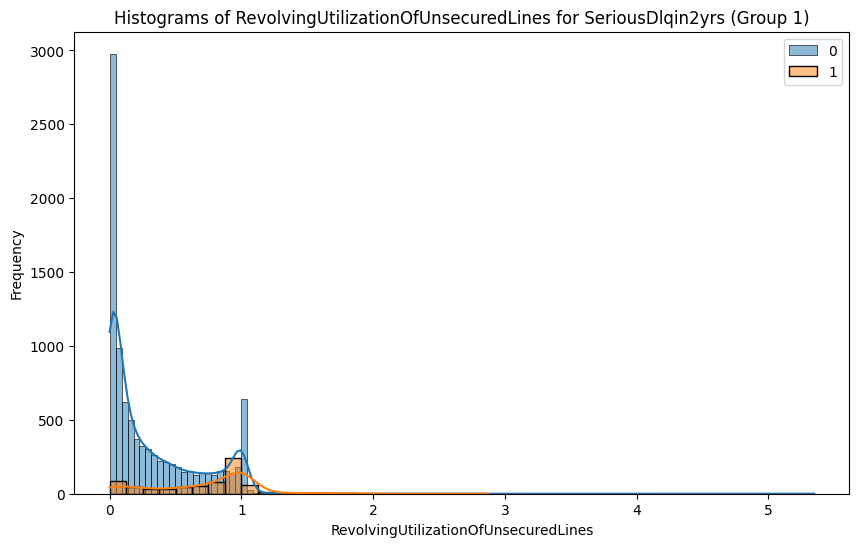

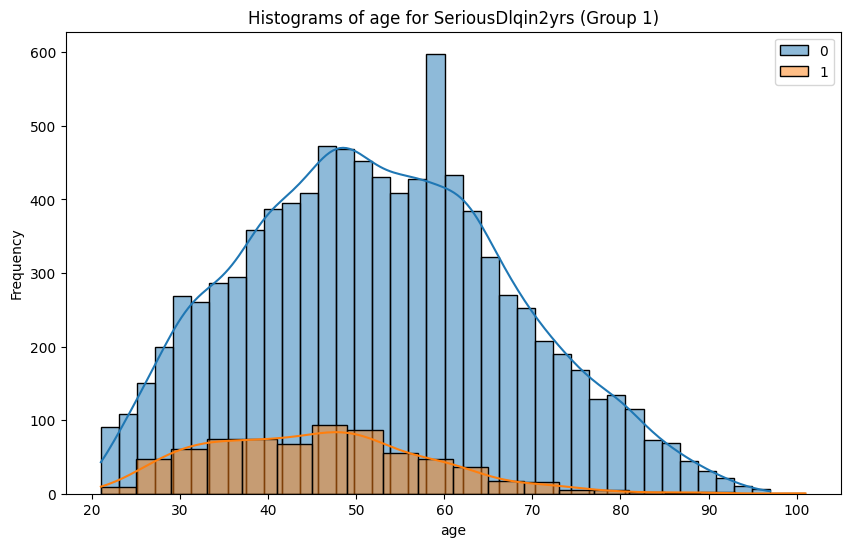

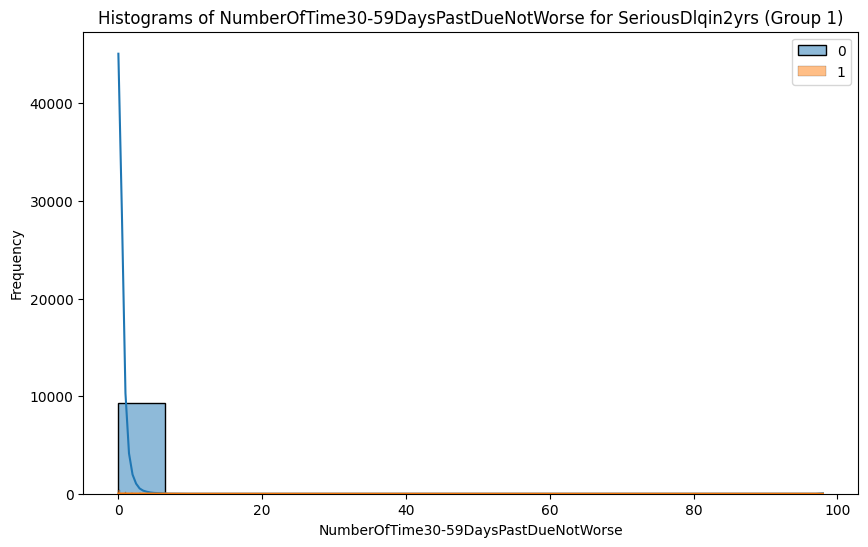

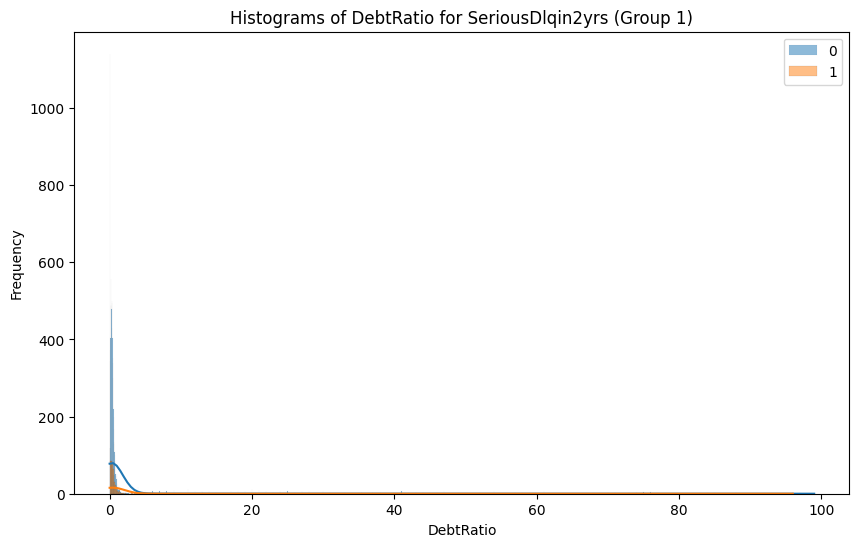

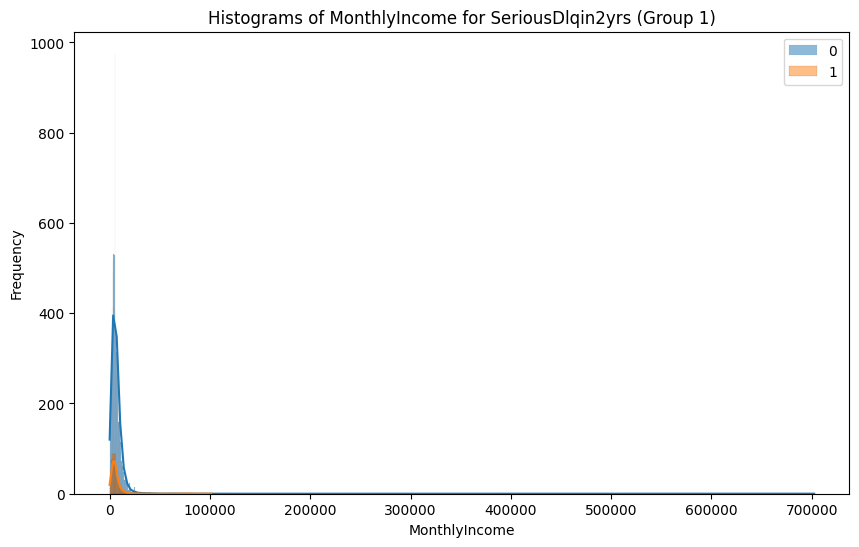

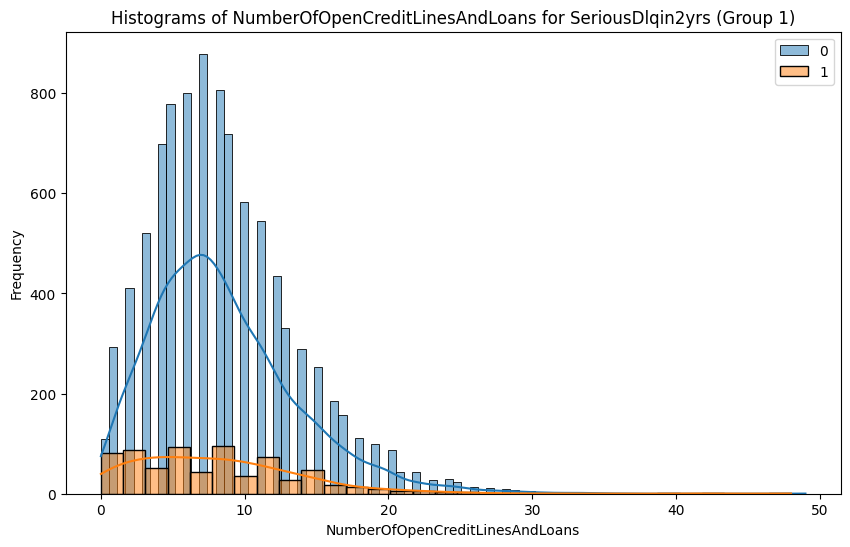

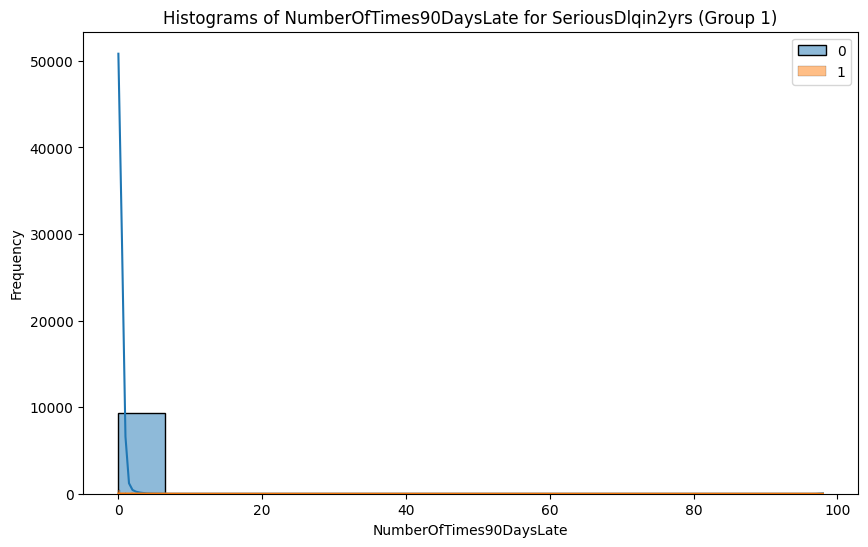

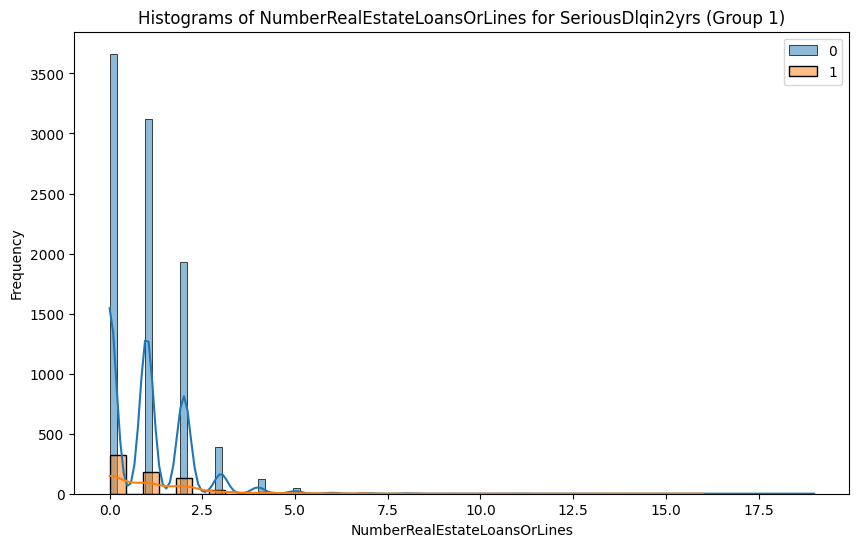

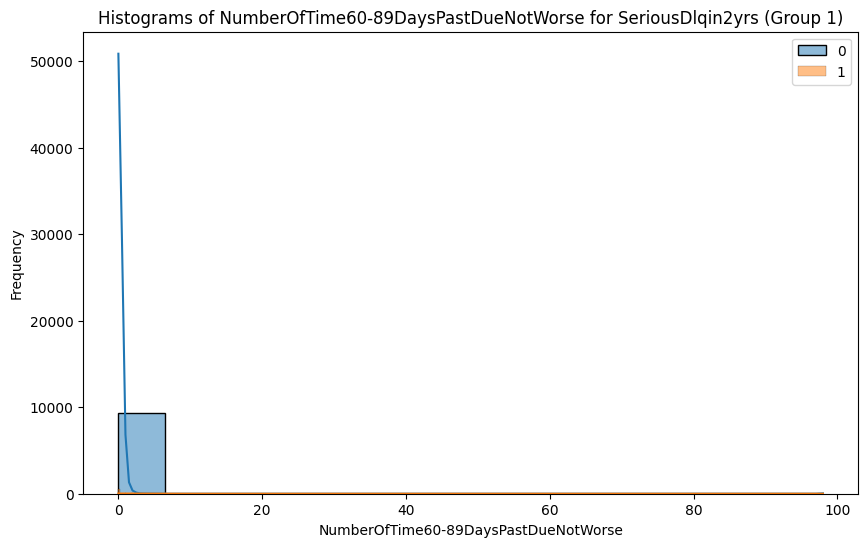

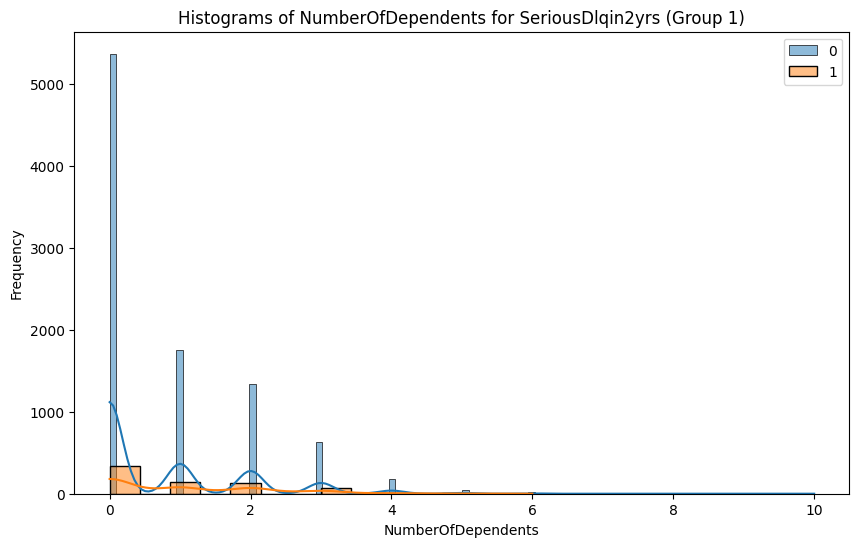

In [15]:
features = [col for col in train_set.columns if col != target]

for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

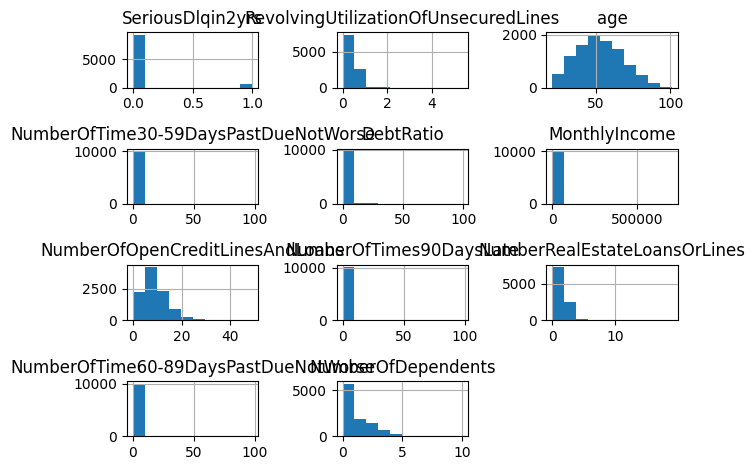

In [17]:
train_set.hist()
plt.tight_layout()

In [20]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [ ]:
features = [col for col in train_set.columns if col != target]

In [21]:
#Aplico Logaritmo +1 porque tienen 0 , menos a Age

for col in features:
    if col != "age":
        train_set_scaled[col] = np.log(train_set_scaled[col] + 1) 
        test_set_scaled[col] = np.log(test_set_scaled[col] + 1)

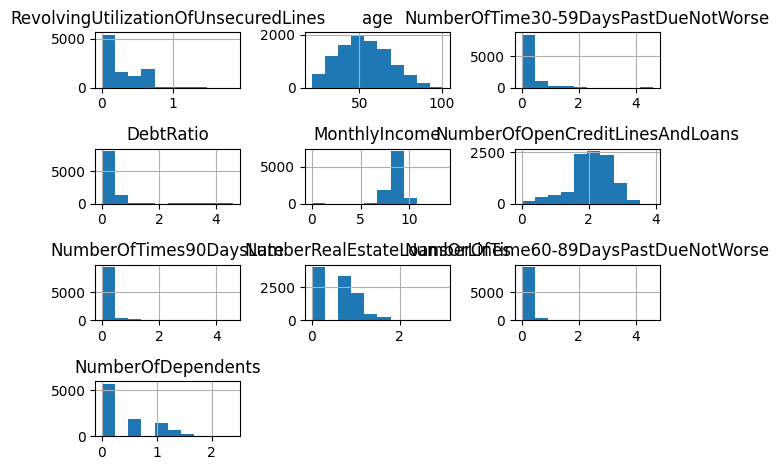

In [22]:
train_set_scaled[features].hist()
plt.tight_layout()

In [23]:
#Hago el escalado

scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [ ]:
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]

y_train = train_set[target]
y_test = test_set[target]


In [25]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.74      0.32      0.45       701

    accuracy                           0.94     10029
   macro avg       0.85      0.65      0.71     10029
weighted avg       0.94      0.94      0.93     10029



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



model_names = ["KNN","Logistic Regression","Random Forest","XGBoost","LightGBM"]
knn_clf = KNeighborsClassifier(n_neighbors= 5)
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -100, n_jobs= -1)

model_set = [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]

In [40]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre in ["KNN", "Logistic Regression"]:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier()
LogisticRegression(max_iter=10000)
RandomForestClassifier(max_depth=5, random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
LGBMClassifier(max_depth=5, n_jobs=-1, random_state=42, verbose=-100)


In [41]:
for model_name, valores in metricas_cv.items():
    print(f"Model {model_name}: {valores}")
print(f"El ganador es {ganador}")

Model KNN: 0.5924177907707222
Model Logistic Regression: 0.5639755637804881
Model Random Forest: 0.5541803547581452
Model XGBoost: 0.6009707304935455
Model LightGBM: 0.5929105536793011
El ganador es XGBoost


In [ ]:
#Smote

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train)

In [44]:
y_train_smote.value_counts()

SeriousDlqin2yrs
0    9328
1    9328
Name: count, dtype: int64

In [45]:

model_names = ["KNN","Logistic Regression","Random Forest","XGBoost","LightGBM"]
knn_clf = KNeighborsClassifier(n_neighbors= 5)
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -100, n_jobs= -1)

model_set = [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]


In [46]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre in ["KNN", "Logistic Regression"]:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train_smote_scaled, y_train_smote_scaled, cv = 5, scoring = "balanced_accuracy"))
    else:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train_smote, y_train_smote, cv = 5, scoring = "balanced_accuracy"))
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier()
LogisticRegression(max_iter=10000)
RandomForestClassifier(max_depth=5, random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
LGBMClassifier(max_depth=5, n_jobs=-1, random_state=42, verbose=-100)


In [47]:
for model_name, valores in metricas_cv.items():
    print(f"Model {model_name}: {valores}")
print(f"El ganador es {ganador}")

Model KNN: 0.9054990244505172
Model Logistic Regression: 0.7818395788614663
Model Random Forest: 0.8203808809542282
Model XGBoost: 0.9157413745046824
Model LightGBM: 0.9011614642150059
El ganador es XGBoost


In [54]:
#Undersampling

clase_mayoritaria = X_train[y_train == 0]
clase_minoritaria = X_train[y_train == 1]

clase_mayoritaria_scaled = X_train_scaled[y_train == 0]
clase_minoritaria_scaled = X_train_scaled[y_train == 1]

In [55]:
from sklearn.utils import resample

#Sin Scaled
clase_mayoritaria_bajomuestreo = resample(clase_mayoritaria,
                                          replace=False,
                                          n_samples=len(clase_minoritaria),  
                                          random_state=42)


X_train_bajomuestreo = pd.concat([clase_mayoritaria_bajomuestreo, clase_minoritaria])
y_train_bajomuestreo = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], y_train.loc[clase_minoritaria.index]])

In [59]:
#Con Scaled

clase_mayoritaria_bajomuestreo_scaled = resample(clase_mayoritaria_scaled,
                                          replace=False,
                                          n_samples=len(clase_minoritaria_scaled),  
                                          random_state=42)


X_train_bajomuestreo_scaled = pd.concat([clase_mayoritaria_bajomuestreo_scaled, clase_minoritaria_scaled])
y_train_bajomuestreo_scaled = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo_scaled.index], y_train.loc[clase_minoritaria_scaled.index]])

In [60]:
y_train_bajomuestreo.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [62]:
X_train_bajomuestreo.shape

(1402, 10)

In [63]:

model_names = ["KNN","Logistic Regression","Random Forest","XGBoost","LightGBM"]
knn_clf = KNeighborsClassifier(n_neighbors= 5)
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -100, n_jobs= -1)

model_set = [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]

In [64]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre in ["KNN", "Logistic Regression"]:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train_bajomuestreo_scaled, y_train_bajomuestreo_scaled, cv = 5, scoring = "balanced_accuracy"))
    else:
        metricas_cv[nombre] = np.mean(cross_val_score(modelo, X_train_bajomuestreo, y_train_bajomuestreo, cv = 5, scoring = "balanced_accuracy"))
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier()
LogisticRegression(max_iter=10000)
RandomForestClassifier(max_depth=5, random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
LGBMClassifier(max_depth=5, n_jobs=-1, random_state=42, verbose=-100)


In [65]:
for model_name, valores in metricas_cv.items():
    print(f"Model {model_name}: {valores}")
print(f"El ganador es {ganador}")

Model KNN: 0.75177304964539
Model Logistic Regression: 0.7696555217831813
Model Random Forest: 0.77322695035461
Model XGBoost: 0.7546099290780142
Model LightGBM: 0.7738956433637285
El ganador es LightGBM


In [67]:
### Ajusto Hiperparametros del modelo ganador

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight": ["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100)

lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring= "balanced_accuracy")

lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100),
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [68]:
lgb_grid.best_score_

np.float64(0.7668397945914842)

In [70]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [71]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2345
           1       0.21      0.67      0.32       163

    accuracy                           0.82      2508
   macro avg       0.59      0.75      0.61      2508
weighted avg       0.92      0.82      0.86      2508



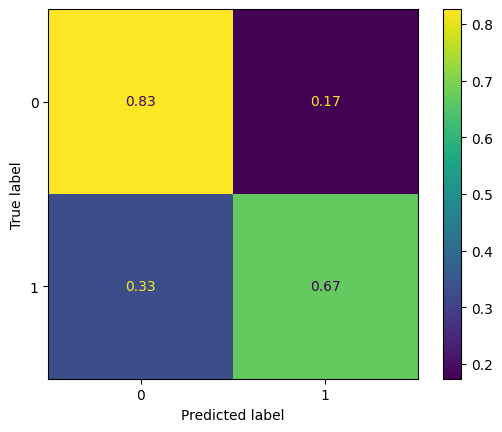

In [72]:
#Analizo errores

ConfusionMatrixDisplay.from_predictions(y_test, lgb_grid.best_estimator_.predict(X_test), normalize = "true")
plt.show()